In [145]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of Models.MLP failed: Traceback (most recent call last):
  File "C:\Users\Andu\anaconda3\envs\Tensorflow\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\Andu\anaconda3\envs\Tensorflow\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\Andu\anaconda3\envs\Tensorflow\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\Andu\anaconda3\envs\Tensorflow\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  Fi

In [146]:
#check out plot_model
#check out model.evaluate

In [147]:
from pathlib import Path
import pandas as pd
from pmdarima.arima import auto_arima


IBBmonth = Path.cwd() / "data" / "Raw" / "IBBmonth.csv"
data_t = pd.read_csv(IBBmonth, usecols=[0,4], parse_dates=[0], header=0)

In [148]:
from Models.ARIMA import *
from Models.Helper import *
from Data.Raw import *
from Models.MLP import *

In [149]:
n_diffs = find_differencing(data_t['Close'].values)

Estimated differencing term: 1


In [150]:
data_t.head()

,Date,Close
0,2020-01-02,119.889999
1,2020-01-03,118.360001
2,2020-01-06,119.120003
3,2020-01-07,119.150002
4,2020-01-08,120.220001


In [151]:
#Split dataset

def split_data(data, training_size):
    if training_size < 0 or training_size > 1:
        raise ValueError("Please use a value between 0 and 1 to split the dataset. Recommended values for the size of the training dataset are: 0.50, 0.67, 0.80.")
    train_data, test_data = data[0:int(len(data)*training_size)], data[int(len(data)*training_size):]
    
    train_data = train_data['Close'].values
    test_data = test_data['Close'].values
    
    print("Number of training samples:", len(train_data))
    print("Number of testing samples:", len(test_data))
    return training_size, train_data, test_data
    
    
split_ratio, train_data, test_data = split_data(data_t, 0.67)

Number of training samples: 183
Number of testing samples: 91


In [152]:
arima_model_test =  auto_arima(train_data,start_p=0, d=n_diffs, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=0, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, seasonal_test='ocsb', error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=None, n_fits = 50)


print(arima_model_test)
print(arima_model_test.order)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=877.706, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=865.102, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=868.316, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=875.856, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=865.138, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=865.880, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=866.875, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=863.372, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=863.347, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=864.721, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=865.067, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=864.122, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=858.165, Time=0.07 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=859.347, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=854.2

In [153]:
#model_predictions = stepwise_ARIMA(train_data, test_data, arima_model_test.order)

In [154]:
#print("Error measures for ARIMA:")
#calculate_error_measures(test_data, model_predictions)

[ 1.00000000e+00  9.78591841e-01  9.63815042e-01  9.46073129e-01
  9.29495533e-01  9.14230055e-01  8.94023465e-01  8.77252433e-01
  8.56885005e-01  8.44011994e-01  8.22266472e-01  8.04271429e-01
  7.87560194e-01  7.67662842e-01  7.53503741e-01  7.37009113e-01
  7.23335893e-01  7.03446952e-01  6.86041846e-01  6.70455696e-01
  6.54233576e-01  6.38323070e-01  6.18620739e-01  6.03167918e-01
  5.89876843e-01  5.76517566e-01  5.63325285e-01  5.51244998e-01
  5.40099292e-01  5.26317847e-01  5.12270589e-01  4.97663140e-01
  4.84141252e-01  4.71049413e-01  4.55809554e-01  4.43610310e-01
  4.31072128e-01  4.19115058e-01  4.05933114e-01  3.92631619e-01
  3.82471437e-01  3.71929356e-01  3.64339634e-01  3.56686480e-01
  3.47476922e-01  3.38818709e-01  3.29640300e-01  3.24281559e-01
  3.13095324e-01  3.01872258e-01  2.88815605e-01  2.73153567e-01
  2.57772495e-01  2.40072112e-01  2.24926561e-01  2.09230028e-01
  1.95383076e-01  1.84240774e-01  1.74156450e-01  1.65134753e-01
  1.52209887e-01  1.40929

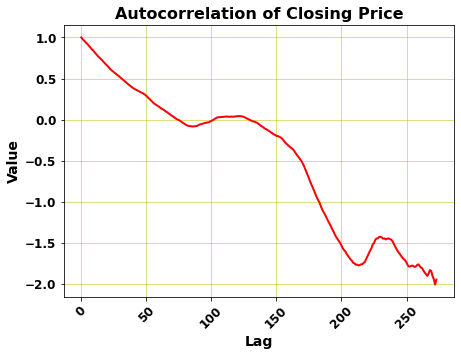

In [155]:
batch_size = find_batch_size(data_t['Close'])

In [156]:
data_close = pd.DataFrame(data_t['Close'])
data_close.index = pd.to_datetime(data_t['Date'])

list_of_attributes = ['Close']

list_of_prev_t_instants = []
for i in range(1, batch_size):
    list_of_prev_t_instants.append(i)


df_new = create_regressor_attributes(data_close, list_of_attributes, list_of_prev_t_instants)
df_new.head()
df_new.shape

(269, 6)